In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import curve_fit 

In [55]:
df1= pd.read_csv('Zeel_ConversionActions.csv',skiprows=2,index_col='Day',parse_dates=True)
df2= pd.read_csv('Zeel_RegularStats.csv',skiprows=2,index_col='Day',parse_dates=True)

In [56]:
df=df1.merge(df2,on=['Day','Campaign'])

In [57]:
df.to_csv('merged data.csv',index=False)

In [58]:
df.columns.tolist()

['Campaign',
 'Path - Android App Install_All conv.',
 'Path - Corporate Inquiry – Contact_All conv.',
 'Path - Corporate – Booking_All conv.',
 'Path - CurrentCustomer – Booking_All conv.',
 'Path - Email Capture (No Password)_All conv.',
 'Path - Gift Card – Booking_All conv.',
 'Path - NetNewCustomer – Booking_All conv.',
 'Path - UpgradingCustomer – Booking_All conv.',
 'Currency',
 'Clicks',
 'Impressions',
 'Cost',
 'Avg. position',
 'Search Impr. share']

In [10]:
df['Cost'] = pd.to_numeric(df['Cost'],errors='coerce')
df['Path - NetNewCustomer – Booking_All conv.'] = pd.to_numeric(df['Path - NetNewCustomer – Booking_All conv.'],errors='coerce')
#df = df.drop(df[(df['Cost']<100) & (df['Path - NetNewCustomer – Booking_All conv.']<1)].index)

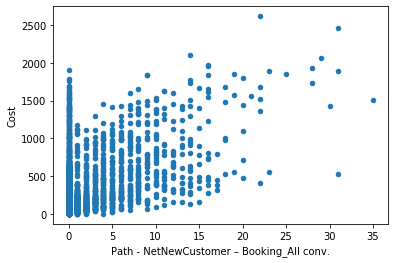

In [60]:
data = pd.concat([df['Cost'], df['Path - NetNewCustomer – Booking_All conv.']], axis=1)
data.plot.scatter(x='Path - NetNewCustomer – Booking_All conv.', y='Cost');

In [12]:
df = df[~df["Campaign"].str.contains("Brand", na=False)]
df = df[~df["Campaign"].str.contains("YouTube", na=False)]
df = df[~df["Campaign"].str.contains("GDN", na=False)]
df = df[~df["Campaign"].str.contains("Croud", na=False)]
df = df[~df["Campaign"].str.contains("Display", na=False)]
#df = df.drop(df[(df['Cost']<100.0) & (df['Path - NetNewCustomer – Booking_All conv.']<1.0)].index)

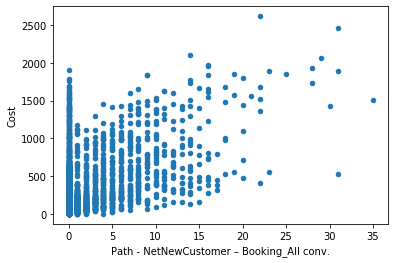

In [59]:
var1='Path - NetNewCustomer – Booking_All conv.'
data = pd.concat([df['Cost'], df[var1]], axis=1)
data.plot.scatter(x=var1, y='Cost');

In [17]:
numerical_features = df.select_dtypes(include=['int64','float64'])
categorical_features = df.select_dtypes(include='object')

In [18]:
df.isnull().sum()

Campaign                                                                                                 0
*Croud AdWords - New PAYGO (2018)_All conv.                                                              0
*Croud AdWords - New Zeelot (2018)_All conv.                                                             0
*Croud AdWords - PAYGO (2018)_All conv.                                                                  0
*Croud AdWords - Zeelot (2018)_All conv.                                                                 0
*Croud AdWords - Zeelot Additional Appt (2018)_All conv.                                                 0
*New PAYGO_All conv.                                                                                     0
*New Zeelot - Croud_All conv.                                                                            0
*PAYGO - Croud_All conv.                                                                                 0
*Zeelot - Croud_All conv.            

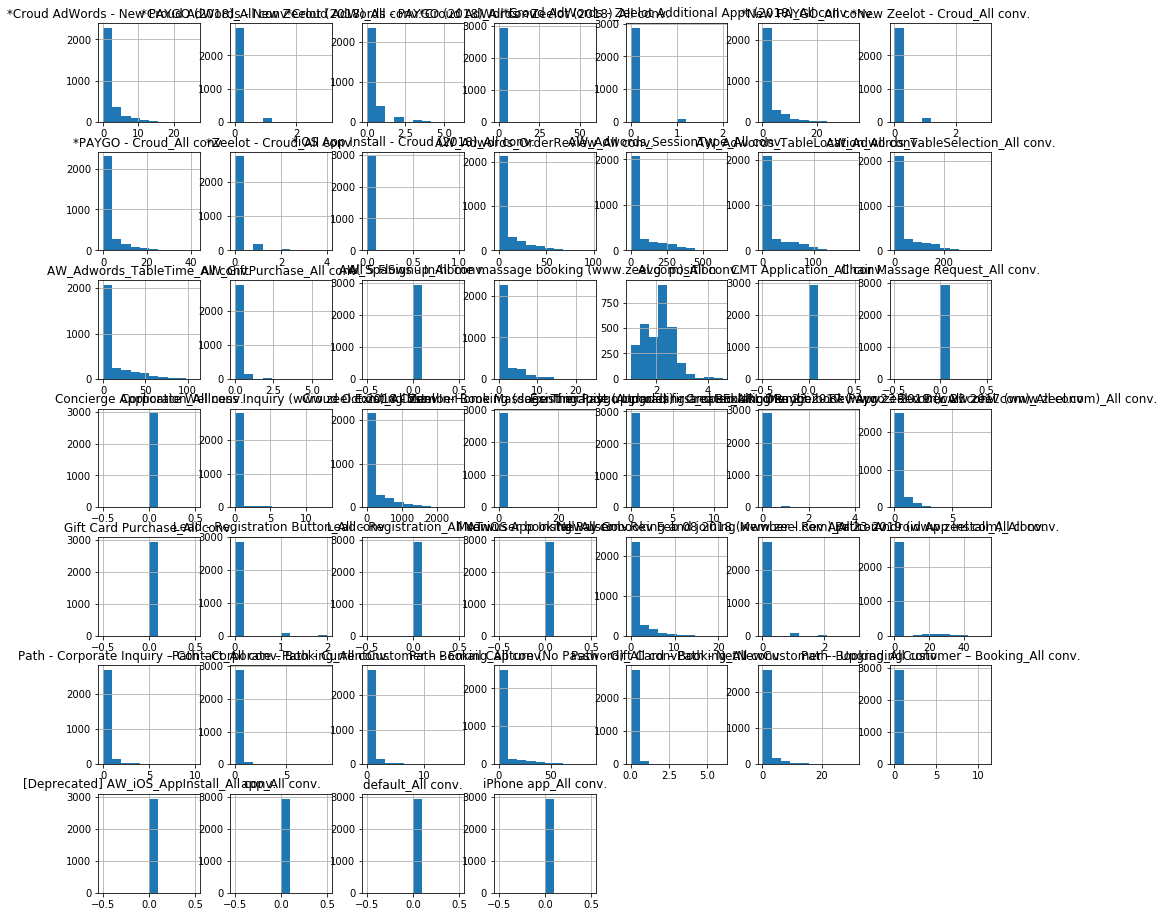

In [19]:
numerical_features.hist(figsize=[16,16]);

In [49]:
# split data back into train and test sets
split_index = round(data.shape[0]/2)
train_data = df.iloc[:split_index,:]
test_data = df.iloc[split_index:,:]

In [50]:
# create x and y columns
X = train_data.loc[:, train_data.columns != 'Cost']
y = train_data['Cost']
# create dummy variables
X = pd.get_dummies(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

samples_per_leaf = [1, 5, 10, 15, 25, 50]
rf_scores = []

for num_samples in samples_per_leaf:
    rf.set_params(min_samples_leaf=num_samples)
    scores = cross_val_score(estimator=rf, X=X, y=y, scoring=rmse, cv=10)
    rf_scores.append((np.mean(scores), num_samples))

C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

In [23]:
rf_scores

[(111.88087158202106, 1),
 (108.59308898419481, 5),
 (112.46844379752322, 10),
 (112.79179788119852, 15),
 (116.71661573778927, 25),
 (127.8783774896555, 50)]

In [24]:
min(rf_scores)

(108.59308898419481, 5)

In [25]:
rf.set_params(min_samples_leaf=5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
rf.score(X_train, y_train)

0.9691385567633616

In [34]:
rf.score(X_test,y_test)

0.9131393273975161

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr.score(X_train,y_train)

0.999990170301522

In [43]:
lr.score(X_test,y_test)

-8088876806682.682